In [16]:
import sys
import pandas as pd
import numpy as np
import difflib
import gzip
from scipy import stats
import glob
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [17]:
#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
CSV_PATH= "../data/yvr-weather"
PHOTO_PATH = "/mnt/e/data/katkam-secret-location/katkam-scaled"
def load_csvs(path):
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,skiprows=16,parse_dates=[0])
        list_.append(df)
    frame = pd.concat(list_)
    return frame
data = load_csvs(CSV_PATH)

data = data[data["Data Quality"].notnull()]
# data["Time"]=data["Date/Time"]
columns= ["Date/Time","Weather"]
data = data[columns]
data

,Date/Time,Weather
0,2016-06-01 00:00:00,NaN
1,2016-06-01 01:00:00,Cloudy
2,2016-06-01 02:00:00,NaN
3,2016-06-01 03:00:00,NaN
4,2016-06-01 04:00:00,Mostly Cloudy
5,2016-06-01 05:00:00,NaN
6,2016-06-01 06:00:00,NaN
7,2016-06-01 07:00:00,Mostly Cloudy
8,2016-06-01 08:00:00,NaN
9,2016-06-01 09:00:00,NaN


In [4]:
def enum_photos(path):
    data = pd.DataFrame()
    data["Filename"] = os.listdir(path)
    data["Time"] = data["Filename"].apply(lambda x: x[x.find("-")+1:x.find(".")])
    data["Time"] = pd.to_datetime(data["Time"])
    return data
photo_data = enum_photos(PHOTO_PATH)

# pd.to_datetime(photo_data["Time"])
photo_data

,Filename,Time
0,katkam-20160605060000.jpg,2016-06-05 06:00:00
1,katkam-20160605070000.jpg,2016-06-05 07:00:00
2,katkam-20160605080000.jpg,2016-06-05 08:00:00
3,katkam-20160605090000.jpg,2016-06-05 09:00:00
4,katkam-20160605100000.jpg,2016-06-05 10:00:00
5,katkam-20160605110000.jpg,2016-06-05 11:00:00
6,katkam-20160605120000.jpg,2016-06-05 12:00:00
7,katkam-20160605130000.jpg,2016-06-05 13:00:00
8,katkam-20160605140000.jpg,2016-06-05 14:00:00
9,katkam-20160605150000.jpg,2016-06-05 15:00:00


In [5]:
# pd.concat([data,photo_data], axis=1, join_axes=[data["Date/Time"]])
comined_data = pd.merge(data, photo_data, how='inner', left_on="Date/Time", right_on="Time")
# comined_data[comined_data["Weather"].notnull()]
comined_data["Weather"].unique()

array([nan, 'Mainly Clear', 'Mostly Cloudy', 'Cloudy', 'Rain Showers',
       'Moderate Rain Showers', 'Clear', 'Rain', 'Rain,Fog', 'Drizzle',
       'Rain Showers,Fog', 'Thunderstorms', 'Fog', 'Drizzle,Fog',
       'Moderate Rain Showers,Fog', 'Rain,Drizzle', 'Moderate Rain',
       'Moderate Rain,Drizzle', 'Heavy Rain', 'Moderate Rain,Fog',
       'Rain,Drizzle,Fog', 'Heavy Rain,Fog', 'Snow Showers', 'Snow',
       'Snow,Fog', 'Rain,Snow', 'Freezing Fog', 'Rain,Snow,Fog',
       'Moderate Snow', 'Rain Showers,Snow Showers,Fog',
       'Rain Showers,Snow Pellets', 'Rain Showers,Snow Showers'], dtype=object)

In [10]:
comined_data[comined_data['Weather'].str.contains("Rain",case=False,na=False) |
             comined_data['Weather'].str.contains("Cloud",case=False,na=False)]

,Date/Time,Weather,Filename,Time
3,2016-06-05 10:00:00,Mostly Cloudy,katkam-20160605100000.jpg,2016-06-05 10:00:00
6,2016-06-05 13:00:00,Mostly Cloudy,katkam-20160605130000.jpg,2016-06-05 13:00:00
9,2016-06-05 16:00:00,Mostly Cloudy,katkam-20160605160000.jpg,2016-06-05 16:00:00
12,2016-06-05 19:00:00,Mostly Cloudy,katkam-20160605190000.jpg,2016-06-05 19:00:00
16,2016-06-06 07:00:00,Mostly Cloudy,katkam-20160606070000.jpg,2016-06-06 07:00:00
19,2016-06-06 10:00:00,Mostly Cloudy,katkam-20160606100000.jpg,2016-06-06 10:00:00
22,2016-06-06 13:00:00,Mostly Cloudy,katkam-20160606130000.jpg,2016-06-06 13:00:00
28,2016-06-06 19:00:00,Mostly Cloudy,katkam-20160606190000.jpg,2016-06-06 19:00:00
38,2016-06-07 13:00:00,Mostly Cloudy,katkam-20160607130000.jpg,2016-06-07 13:00:00
41,2016-06-07 16:00:00,Cloudy,katkam-20160607160000.jpg,2016-06-07 16:00:00


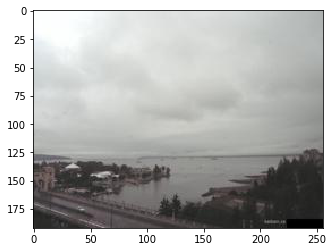

In [14]:
img=mpimg.imread(PHOTO_PATH+"/"+'katkam-20170618160000.jpg')
plt.imshow(img)
plt.show()